In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Les constantes nécessaires sont:

In [3]:
# Constantes

E_Na = 55
g_Na = 40
E_K = -77
g_K = 35
E_L = -65
g_L = 0.3
C = 1

Les équations auxiliaires et les équations différentielles:

In [4]:
def alpha_n(V):
    return 0.02 * (V - 25) / (1 - np.exp(-(V-25)/9))

def beta_n(V):
    return -0.002 * (V - 25) / (1 - np.exp((V-25)/9))

def alpha_m(V):
    return 0.182 * (V + 35) / (1 - np.exp(-(V+35)/9))

def beta_m(V):
    return -0.124 * (V + 35) / (1 - np.exp((V+35)/9))

def alpha_h(V):
    return 0.25 * np.exp(-(V+90)/12)

def beta_h(V):
    return 0.25 * np.exp((V+62)/6) / np.exp((V+90)/12)

def CdV_dt(V, m, n, h, I_ext):
    return g_L*(E_L-V) + g_Na*(m**3)*h*(E_Na-V) + g_K*(n**4)*(E_K-V) + I_ext

def dm_dt(V, m, n, h, I_ext):
    return alpha_m(V)*(1-m) - beta_m(V)*m

def dn_dt(V, m, n, h, I_ext):
    return alpha_n(V)*(1-n) - beta_n(V)*n

def dh_dt(V, m, n, h, I_ext):
    return alpha_h(V)*(1-h) - beta_h(V)*h

def eqs(t, y, I_ext):

    V, m, n, h = y

    return [
        CdV_dt(V, m, n, h, I_ext),
        dm_dt(V, m, n, h, I_ext),
        dn_dt(V, m, n, h, I_ext),
        dh_dt(V, m, n, h, I_ext)
    ]

integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12

On peut donc intégrer les équations et les grapher avec les valeurs désirées:

In [8]:
def plot_system(t_final, I_ext, initial):

    sol = solve_ivp(eqs, (0, t_final), initial, args=(I_ext,), **integrator_keywords)
        
    t_data = sol.t
    (V_data, m_data, n_data, h_data) = sol.y

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # V vs t
    axs[0, 0].plot(t_data, V_data, label=f'V (initial: {initial[0]})', color='blue')
    axs[0, 0].set_title(f"V en fonction de t, I_ext = {I_ext}")
    axs[0, 0].set_xlabel('t')
    axs[0, 0].set_ylabel('V')
    axs[0, 0].legend(loc='lower right')

    # m, n, h vs t
    axs[1, 0].plot(t_data, m_data, label=f'm (initial: {initial[1]})', color='red')
    axs[1, 0].plot(t_data, n_data, label=f'n (initial: {initial[2]})', color='green')
    axs[1, 0].plot(t_data, h_data, label=f'h (initial: {initial[3]})', color='orange')
    axs[0, 0].set_title(f"m, n et h en fonction de t, I_ext = {I_ext}")
    axs[1, 0].set_xlabel('t')
    axs[1, 0].set_ylabel('m, n, h')
    axs[1, 0].legend()

    # V vs h
    axs[0, 1].plot(h_data, V_data, label=f'V', color='blue')
    axs[0, 1].set_title(f'V en fonction de h, I_ext = {I_ext}')
    axs[0, 1].set_xlabel('h')
    axs[0, 1].set_ylabel('V')

    # m vs h
    axs[1, 1].plot(h_data, m_data, label=f'm', color='red')
    axs[1, 1].set_title(f'm en fonction de h, I_ext = {I_ext}')
    axs[1, 1].set_xlabel('h')
    axs[1, 1].set_ylabel('m')

    plt.subplots_adjust(hspace=0.3)
    plt.show()


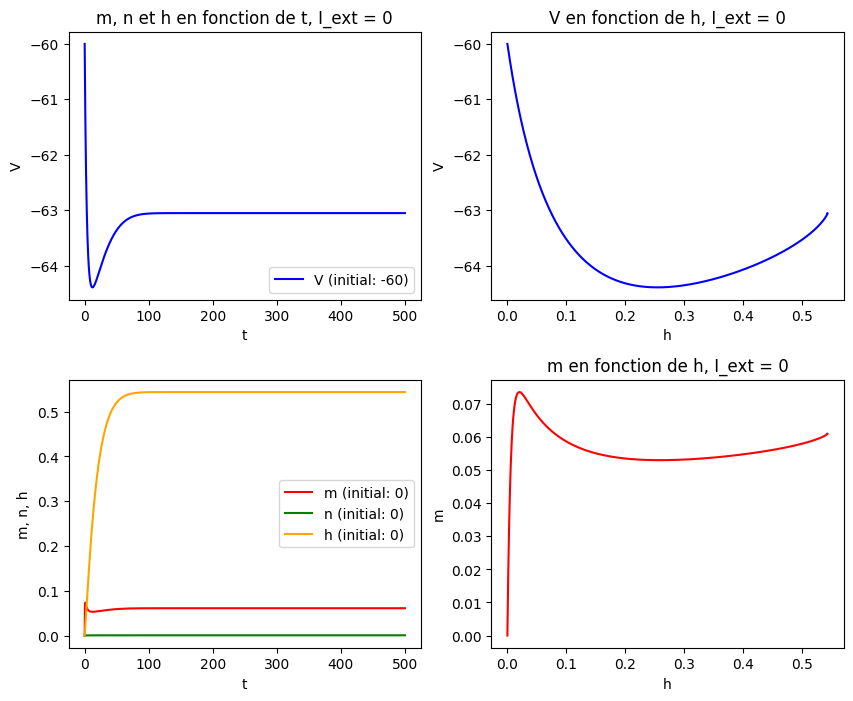

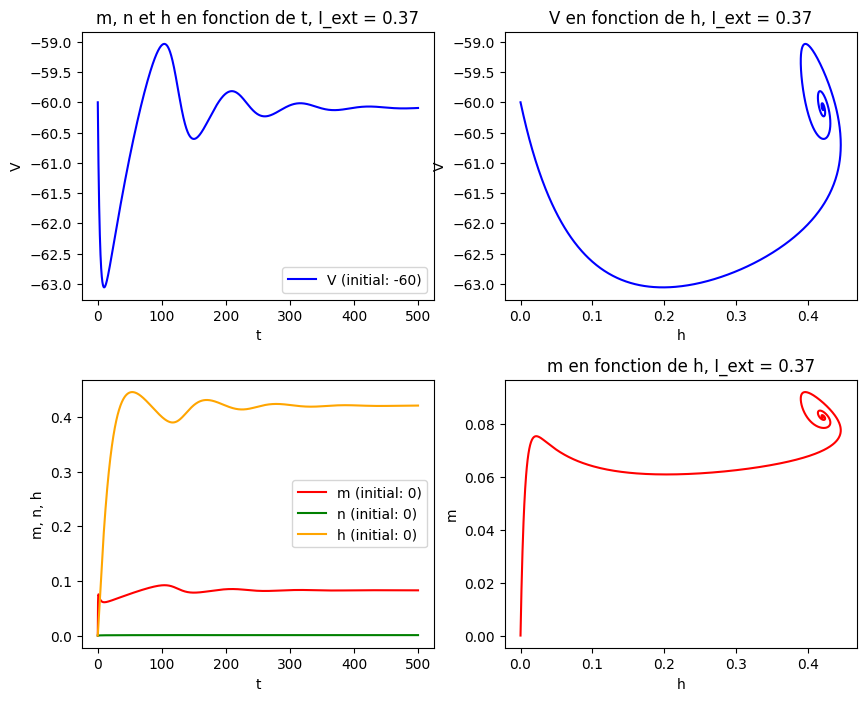

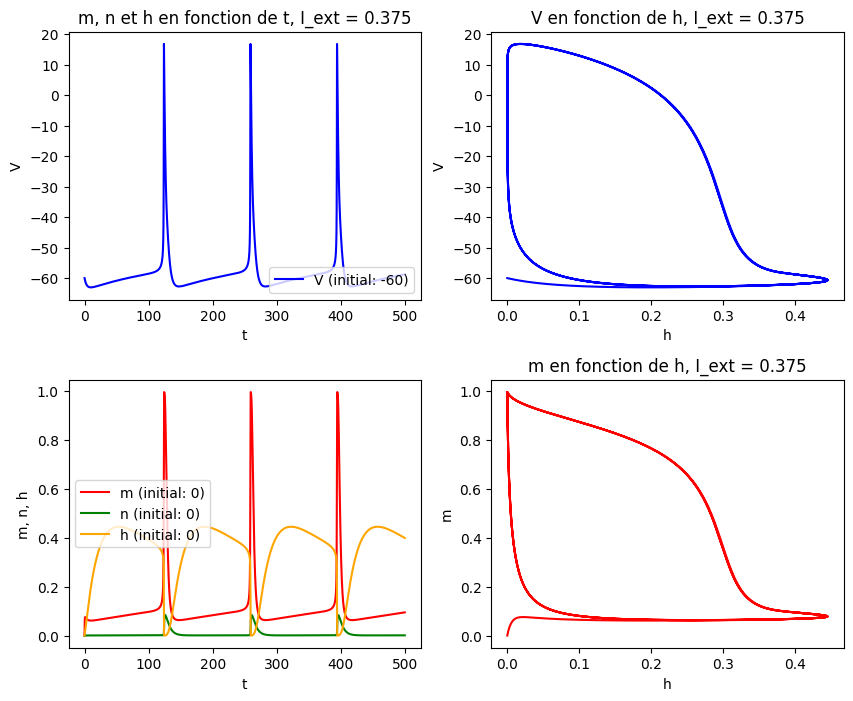

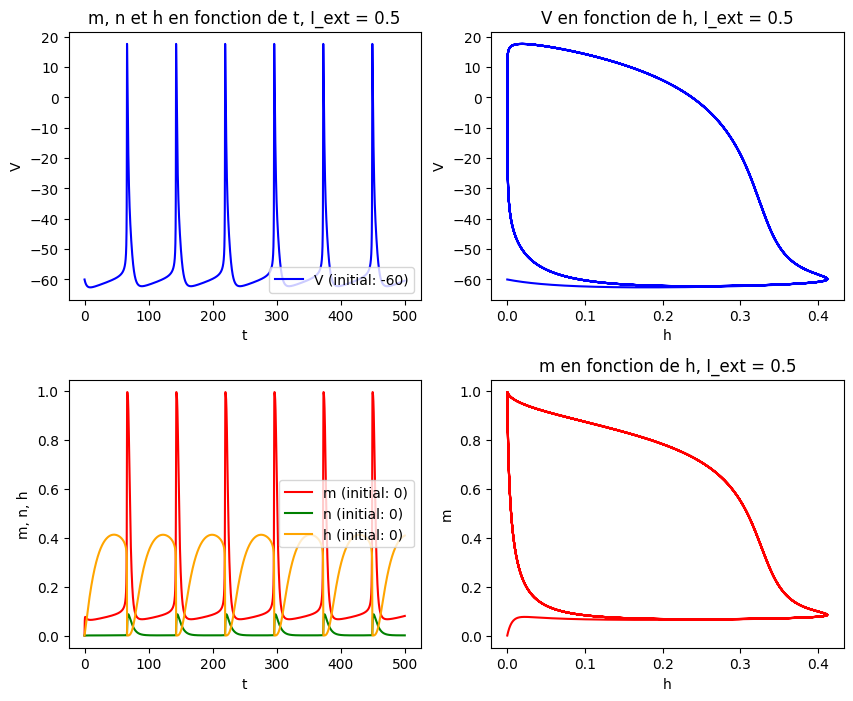

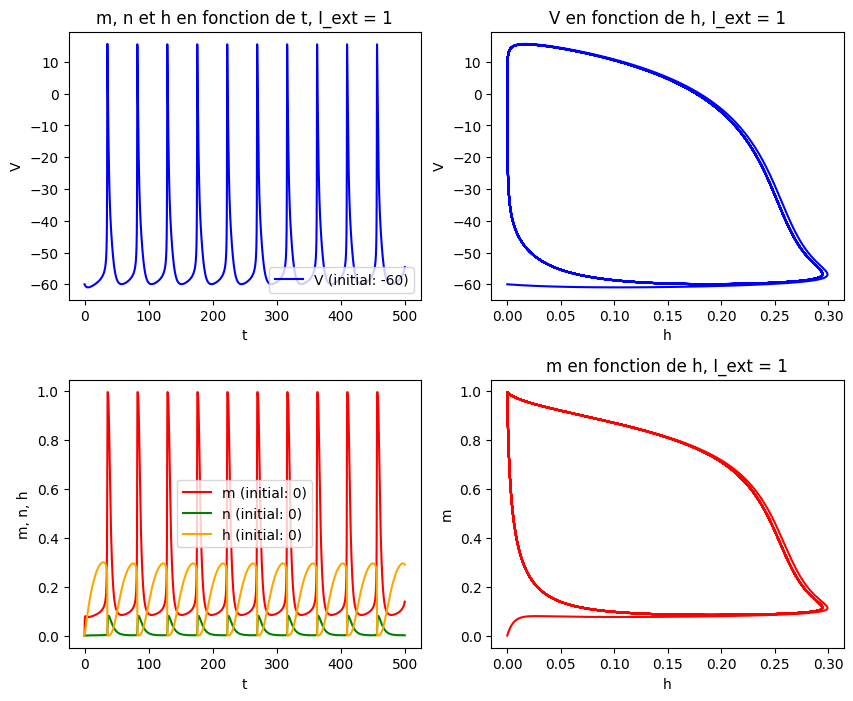

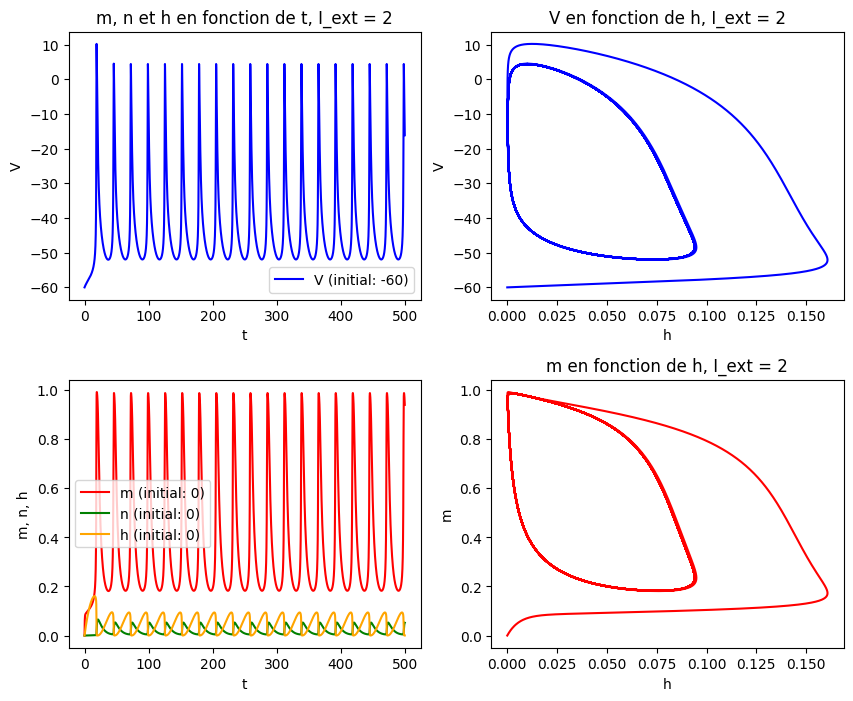

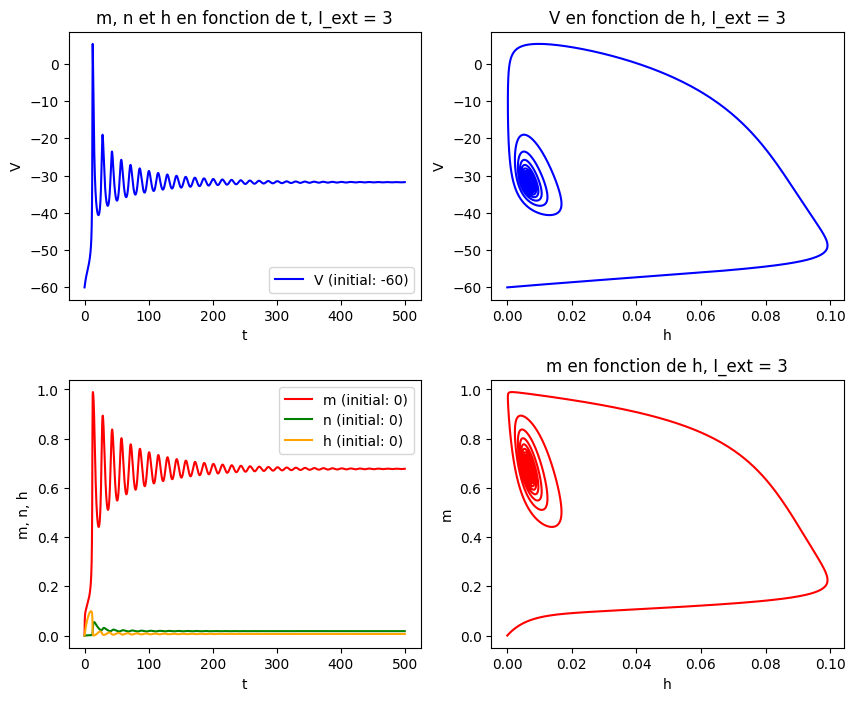

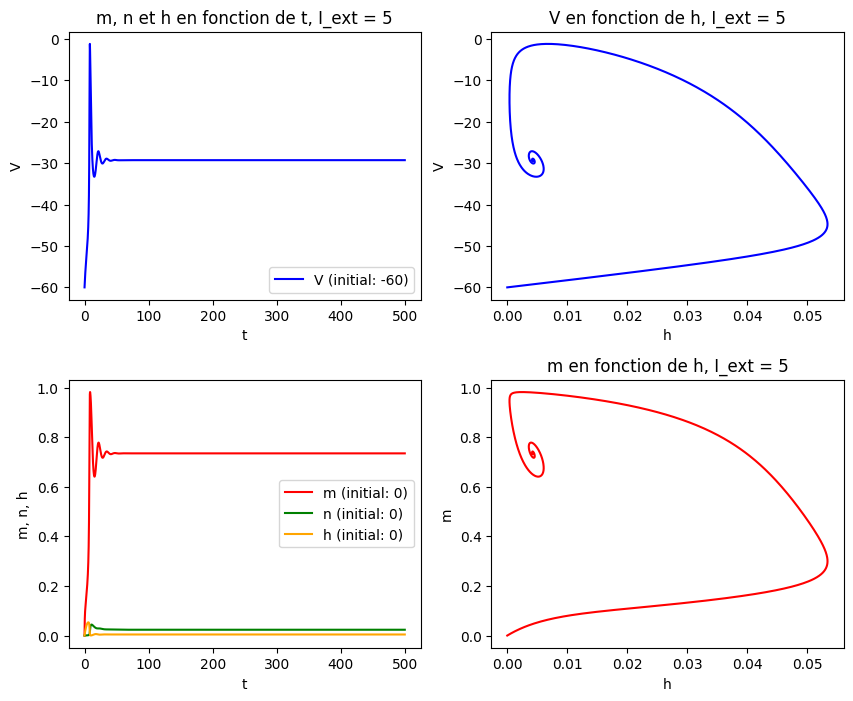

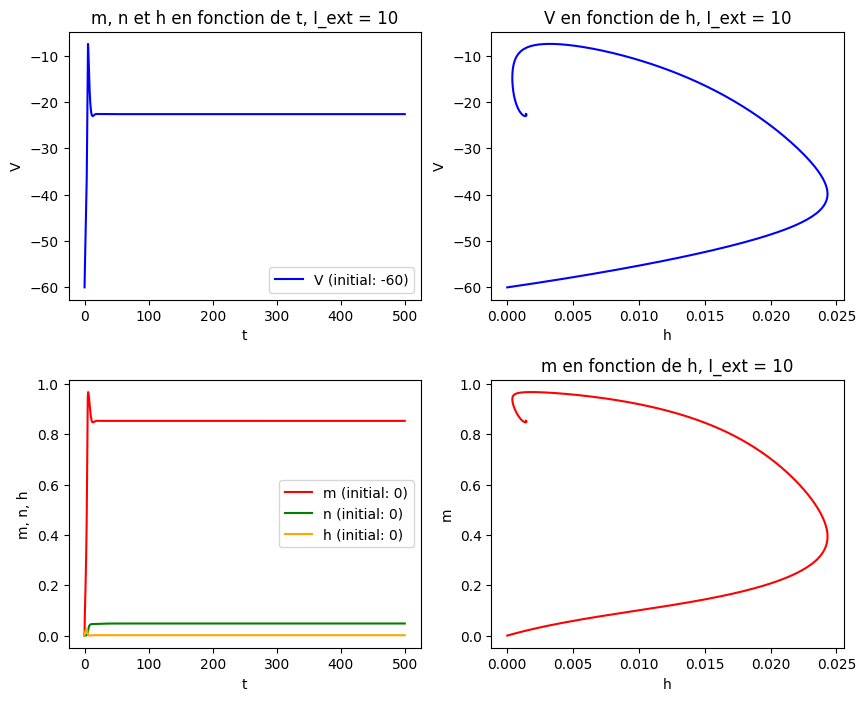

In [9]:
plot_system(500, 0, [-60, 0, 0, 0])

plot_system(500, 0.37, [-60, 0, 0, 0])

plot_system(500, 0.375, [-60, 0, 0, 0])

plot_system(500, 0.5, [-60, 0, 0, 0])

plot_system(500, 1, [-60, 0, 0, 0])

plot_system(500, 2, [-60, 0, 0, 0])

plot_system(500, 3, [-60, 0, 0, 0])

plot_system(500, 5, [-60, 0, 0, 0])

plot_system(500, 10, [-60, 0, 0, 0])